In [1]:
import matplotlib.pyplot as plt
import csv
import datetime
from matplotlib.dates import DateFormatter

In [2]:
seconds = []
temperature = []
humidity = []

with open('Data.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    next(lines, None)
    next(lines, None)
    next(lines, None)
    next(lines, None)
    for row in lines:
        seconds.append(float(row[1]))
        temperature.append(float(row[2]))
        humidity.append(float(row[3]))

In [3]:
epoch_time = 1707199800
for i in range(0, len(seconds)):
    seconds[i] = datetime.datetime.fromtimestamp(int(seconds[i]) + epoch_time)

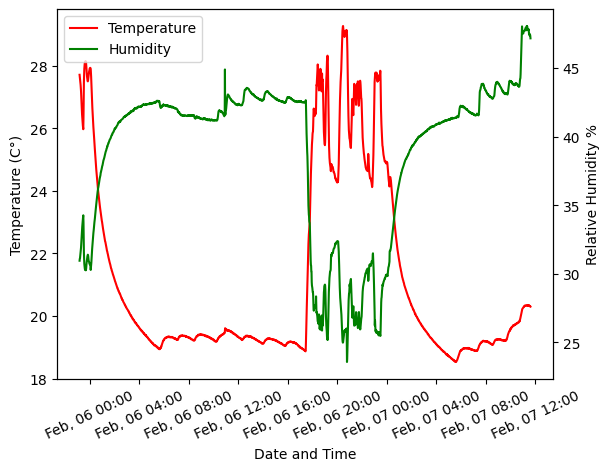

In [48]:
fig, ax1 = plt.subplots()
ln1 = ax1.plot(seconds,temperature, color='r', label='Temperature')
ax1.set_xlabel('Date and Time')
ax1.set_ylabel('Temperature (C\N{DEGREE SIGN})')

plt.xticks(rotation=25)
date_form = DateFormatter('%b, %d %H:%M')
ax1.xaxis.set_major_formatter(date_form)
ax2 = ax1.twinx()
ln2 = ax2.plot(seconds,humidity, color='g', label='Humidity')
ax2.set_ylabel("Relative Humidity %")

axs = ln1+ln2
xabs = [a.get_label() for a in axs]
ax1.legend(axs, xabs, loc=2)


plt.savefig('plot.png', bbox_inches='tight')
plt.show()